In [21]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
beer_df = pd.read_csv("Consumo_cerveja.csv")

In [3]:
beer_df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like lot of rows have all missing values and there seems to be some data discrepency with the Temperature media etc., instead of a decimal point we have a comma. This needs to be addressed. Date column can be feature engineered, to be split into days. Since the language is Portuguese, converting the column names into English would be convinient.

In [4]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [5]:
# Dropping rows with all NAN Values
beer_df.dropna(how = 'all', inplace = True)

In [6]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [7]:
# Replacing commas with period
beer_df.replace({',':'.'}, regex = True, inplace = True)

In [8]:
beer_df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


In [9]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


We could either remove the date column or convert it into days and see if beer consumption is affected by day of the week. Generally it is assumed that weekends have higher alcohol consumption than weekdays and we already have a column for that. Lets just look at the days as well before we decide to drop the date column or convert into days.

In [10]:
# Converting the type of Data to Date time
beer_df['Data'] = pd.to_datetime(beer_df['Data'])

In [16]:
beer_df.info()
days = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 8 columns):
Data                           365 non-null datetime64[ns]
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
Day                            365 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 25.7+ KB


In [17]:
beer_df['Day'] = beer_df['Data'].apply(lambda a: days[a.weekday()])

In [18]:
beer_df['Day']

0       Thursday
1         Friday
2       Saturday
3         Sunday
4         Monday
         ...    
360       Sunday
361       Monday
362      Tuesday
363    Wednesday
364     Thursday
Name: Day, Length: 365, dtype: object

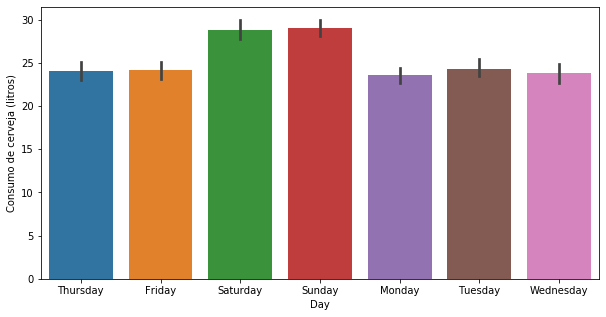

In [24]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Day", y="Consumo de cerveja (litros)", data=beer_df)

This shows that the days of the week doesnt matter much atleast in this data set and we can drop the 'Data' and the 'Day' columns and use the 'Final de Semana' (Weekend) to continue our analysis

In [25]:
beer_df.drop(['Data','Day'], axis = 1, inplace = True)

In [29]:
# Converting temperature and rainfall columns into float type
beer_df  = beer_df.apply(pd.to_numeric)

In [30]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 6 columns):
Temperatura Media (C)          365 non-null float64
Temperatura Minima (C)         365 non-null float64
Temperatura Maxima (C)         365 non-null float64
Precipitacao (mm)              365 non-null float64
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(6)
memory usage: 30.0 KB


Lets see how the varibles are correlated with a scatterplot

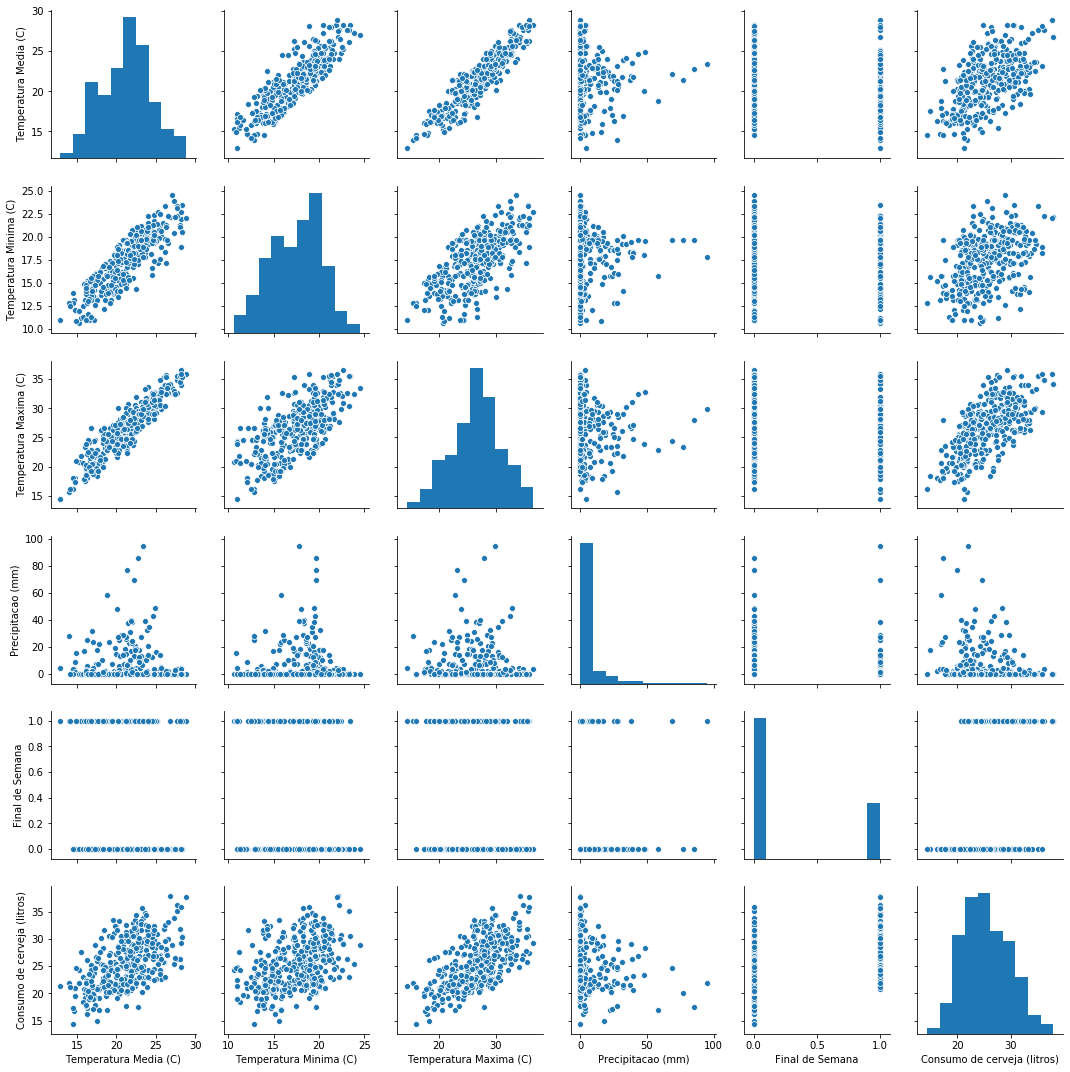

In [32]:
ax = sns.pairplot(beer_df)

The plots are pretty much expected the 'Temperatura Media (C)','Temperatura Minima (C)','Temperatura Maxima (C)' are correlated to each other. There is not much correlation between 'Precipitacao (mm)' and the temperature relted variables.
Lets build our model and see how the variables influence beer consumption

In [77]:
import statsmodels.api  as sm

In [78]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(beer_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [81]:
# Apply scaler() to all the columns except the 'yes-no' variables
num_vars = ['Temperatura Media (C)',
'Temperatura Minima (C)',
'Temperatura Maxima (C)',
'Precipitacao (mm)',
'Consumo de cerveja (litros)']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\ADAMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ADAMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\ADAMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [82]:
df_train.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
326,0.494987,0.676692,0.427230,0.143460,0.0,0.310206
10,0.922306,0.872180,0.953052,0.035865,1.0,0.928668
174,0.102757,0.248120,0.164319,0.040084,0.0,0.122828
118,0.360902,0.466165,0.384977,0.000000,0.0,0.229635
242,0.729323,0.451128,0.830986,0.000000,0.0,0.597525


In [83]:
# Dividing into X and Y sets for model building
y_train = df_train.pop('Consumo de cerveja (litros)')
X_train = df_train

In [84]:
# Add a constant because for stats model we need to explicitely add a constant or the line passes through origin by default
X_train_lm = sm.add_constant(X_train)

C:\Users\ADAMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [85]:
lr = sm.OLS(y_train, X_train_lm).fit()

In [86]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:     Consumo de cerveja (litros)   R-squared:                       0.750
Model:                                     OLS   Adj. R-squared:                  0.745
Method:                          Least Squares   F-statistic:                     149.1
Date:                         Tue, 09 Jun 2020   Prob (F-statistic):           9.40e-73
Time:                                 08:43:41   Log-Likelihood:                 231.65
No. Observations:                          255   AIC:                            -451.3
Df Residuals:                              249   BIC:                            -430.0
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Temperatura Media (C),160.63
2,Temperatura Maxima (C),73.44
1,Temperatura Minima (C),36.77
4,Final de Semana,1.39
3,Precipitacao (mm),1.19


We can see from the VIF values and the p value the Temperature Media (C) has to be dropped to get a better model

In [89]:
X = X_train.drop('Temperatura Media (C)', 1,)

In [90]:
# Building another model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [91]:
# Print a summary of the linear regression model obtained
print(lr_2.summary())

                                 OLS Regression Results                                
Dep. Variable:     Consumo de cerveja (litros)   R-squared:                       0.749
Model:                                     OLS   Adj. R-squared:                  0.745
Method:                          Least Squares   F-statistic:                     186.9
Date:                         Tue, 09 Jun 2020   Prob (F-statistic):           7.18e-74
Time:                                 08:43:45   Log-Likelihood:                 231.54
No. Observations:                          255   AIC:                            -453.1
Df Residuals:                              250   BIC:                            -435.4
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [92]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Temperatura Maxima (C),12.06
0,Temperatura Minima (C),12.05
3,Final de Semana,1.38
2,Precipitacao (mm),1.19


Since 'Temperatura Minima (C)' has high VIF and p value, lets drop this column and build another model

In [93]:
X = X.drop('Temperatura Minima (C)', 1,)

In [94]:
# Building another model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [95]:
# Printing the summary of the linear regression model obtained
print(lr_3.summary())

                                 OLS Regression Results                                
Dep. Variable:     Consumo de cerveja (litros)   R-squared:                       0.748
Model:                                     OLS   Adj. R-squared:                  0.745
Method:                          Least Squares   F-statistic:                     247.8
Date:                         Tue, 09 Jun 2020   Prob (F-statistic):           9.95e-75
Time:                                 08:43:49   Log-Likelihood:                 230.65
No. Observations:                          255   AIC:                            -453.3
Df Residuals:                              251   BIC:                            -439.1
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

Lets check the performance of our model.

In [97]:
y_train_pred = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

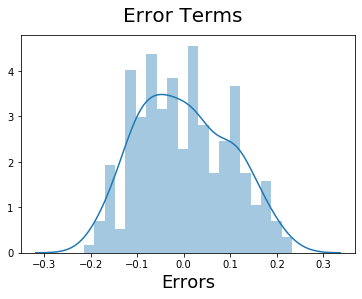

In [98]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)               

In [99]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\ADAMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ADAMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\ADAMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [100]:
y_test = df_test.pop('Consumo de cerveja (litros)')
X_test = df_test

In [101]:
X_test = sm.add_constant(X_test)

C:\Users\ADAMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [104]:
X_test = X_test.drop(['Temperatura Minima (C)', 'Temperatura Media (C)'], axis = 1)

In [105]:
y_pred = lr_3.predict(X_test)

Text(0, 0.5, 'y_pred')

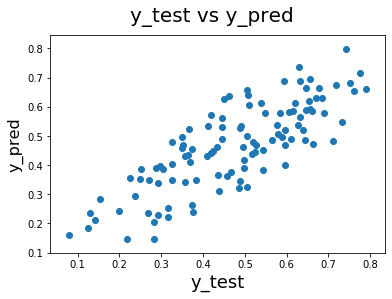

In [106]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

We see from the above test results and coeffcients obtained:

1) The main dependence on beer consumption is on the Maximum temperature so with high temperatures the beer consumptions goes up

2) Next is on the rainfall, if there is rain, the consumption drops down

3) Depends on weather a particular day is a weekend or not, weekends have more consumption than weekdays.

Once again these are correlations and need not necesarrily imply causation.